<a href="https://colab.research.google.com/github/Aiswaryabinu/logistic_regression/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import os
sns.set()

In [ ]:

images_path = "/content/drive/MyDrive/images"
print(os.listdir(images_path))

['00000001_001.png', '00000011_005.png', '00000008_002.png', '00000007_000.png', '00000006_000.png', '00000011_000.png', '00000005_002.png', '00000003_004.png', '00000005_004.png', '00000005_000.png', '00000010_000.png', '00000011_006.png', '00000009_000.png', '00000008_000.png', '00000011_002.png', '00000003_000.png', '00000005_001.png', '00000003_002.png', '00000003_003.png', '00000011_001.png', '00000005_003.png', '00000003_006.png', '00000003_007.png', '00000003_005.png', '00000011_003.png', '00000005_006.png', '00000001_002.png', '00000005_005.png', '00000011_004.png', '00000005_007.png', '00000011_007.png', '00000001_000.png', '00000003_001.png', '00000004_000.png', '00000002_000.png', '00000008_001.png']


In [ ]:
train_df=pd.read_csv('/content/Data_Entry_2017_v2020.csv')

In [ ]:
print(f'There are {train_df.shape[0]} rows and {train_df.shape[1]} columns in this data frame')
train_df.head()


There are 28045 rows and 11 columns in this data frame


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Sex,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0.0,1.0,57.0,M,PA,2682.0,2749.0,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1.0,1.0,58.0,M,PA,2894.0,2729.0,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2.0,1.0,58.0,M,PA,2500.0,2048.0,0.168,0.168
3,00000002_000.png,No Finding,0.0,2.0,80.0,M,PA,2500.0,2048.0,0.171,0.171
4,00000003_001.png,Hernia,0.0,3.0,74.0,F,PA,2500.0,2048.0,0.168,0.168


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28045 entries, 0 to 28044
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  28045 non-null  object 
 1   Finding Labels               28045 non-null  object 
 2   Follow-up #                  28044 non-null  float64
 3   Patient ID                   28044 non-null  float64
 4   Patient Age                  28044 non-null  float64
 5   Patient Sex                  28044 non-null  object 
 6   View Position                28044 non-null  object 
 7   OriginalImage[Width          28044 non-null  float64
 8   Height]                      28044 non-null  float64
 9   OriginalImagePixelSpacing[x  28044 non-null  float64
 10  y]                           28044 non-null  float64
dtypes: float64(7), object(4)
memory usage: 2.4+ MB


In [ ]:
#unqiue patient ID check
print(f"The total patient ids are {train_df['Patient ID'].count()}, from those the unique ids are {train_df['Patient ID'].value_counts().shape[0]} ")

The total patient ids are 28044, from those the unique ids are 7317 


In [ ]:
#list of the names of each patient condition or disease.
columns = train_df.keys()
columns = list(columns)
print(columns)

['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Sex', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]']


columns.remove('Patient ID')
columns.remove('Image Index')
(removed)

reason : cuz both are not labels ,not numeric

In [ ]:
print(f"There are {len(columns)} columns of labels for these conditions: {columns}")

There are 11 columns of labels for these conditions: ['Image Index', 'Finding Labels', 'Follow-up #', 'Patient ID', 'Patient Age', 'Patient Sex', 'View Position', 'OriginalImage[Width', 'Height]', 'OriginalImagePixelSpacing[x', 'y]']


In [ ]:
# Count the occurrences of each finding label
# Since a single image can have multiple labels, we need to split the 'Finding Labels' string
all_finding_labels = train_df['Finding Labels'].str.cat(sep='|')
all_finding_labels = pd.Series(all_finding_labels.split('|'))

# Get the count of each unique finding label
finding_labels_counts = all_finding_labels.value_counts()

print("Number of samples for each finding label:")
print(finding_labels_counts)

Number of samples for each finding label:
No Finding            16352
Infiltration           4131
Effusion               2681
Atelectasis            2623
Nodule                 1398
Pneumothorax           1063
Consolidation          1018
Mass                    968
Cardiomegaly            889
Pleural_Thickening      828
Fibrosis                607
Emphysema               524
Edema                   401
Pneumonia               322
Hernia                   66
Name: count, dtype: int64


In [ ]:
images=train_df['Image Index'].values

In [ ]:
random_images = [np.random.choice(images) for i in range(9)]

In [ ]:
img_dir = '/content/drive/MyDrive/images'

In [ ]:
print('Display Random Images')

Display Random Images


In [ ]:
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [ ]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.5025 and the standard deviation is 0.2644


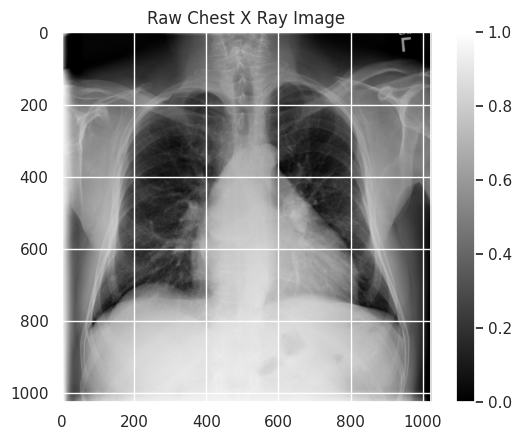

In [ ]:
sample_img = train_df['Image Index'][0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

/tmp/ipython-input-21-1108762320.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),


Text(0, 0.5, '# Pixels in Image')

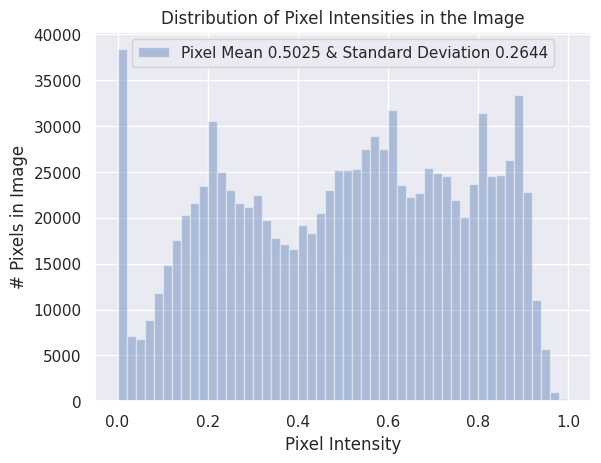

In [ ]:
# ### 1.6 Investigating Pixel Value Distribution by ploting the histogram
sns.distplot(raw_image.ravel(),
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')



Pixel Mean = 0.5025 → The image has balanced brightness, meaning it's neither too dark nor too bright.

 Standard Deviation = 0.2644 → The image has good contrast, indicating a healthy variation in pixel intensities (not flat or noisy).

In [ ]:
#Image preprocessing in keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

In [ ]:
# Create a new column for 'Mass'
train_df['Mass'] = train_df['Finding Labels'].apply(lambda x: 1 if 'Mass' in x else 0)

# Flow from directory with specified batch size and target image size
generator = image_generator.flow_from_dataframe(
        dataframe=train_df,
        directory="/content/drive/MyDrive/images/", # Update directory to the correct path
        x_col="Image Index", # features
        # Let's say we build a model for mass detection
        y_col= ['Mass'], # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 36 validated image filenames.


/usr/local/lib/python3.11/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 28009 invalid image filename(s) in x_col="Image Index". These filename(s) will be ignored.
  warnings.warn(


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 1.8811 and the minimum is -1.9009
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


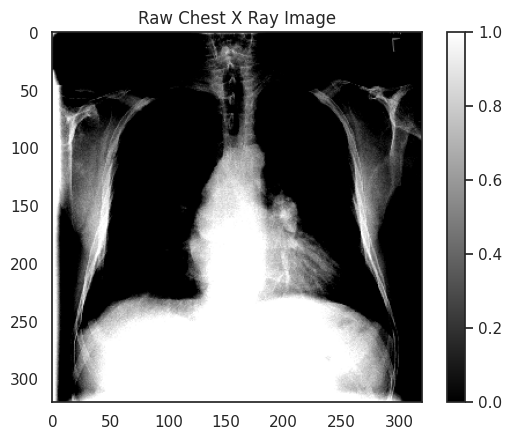

In [ ]:

# Plot a processed image
sns.set_style("white")
generated_image, label = generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")




/tmp/ipython-input-32-427291294.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_image.ravel(),
/tmp/ipython-input-32-427291294.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(generated_image[0].ravel(),


Text(0, 0.5, '# Pixel')

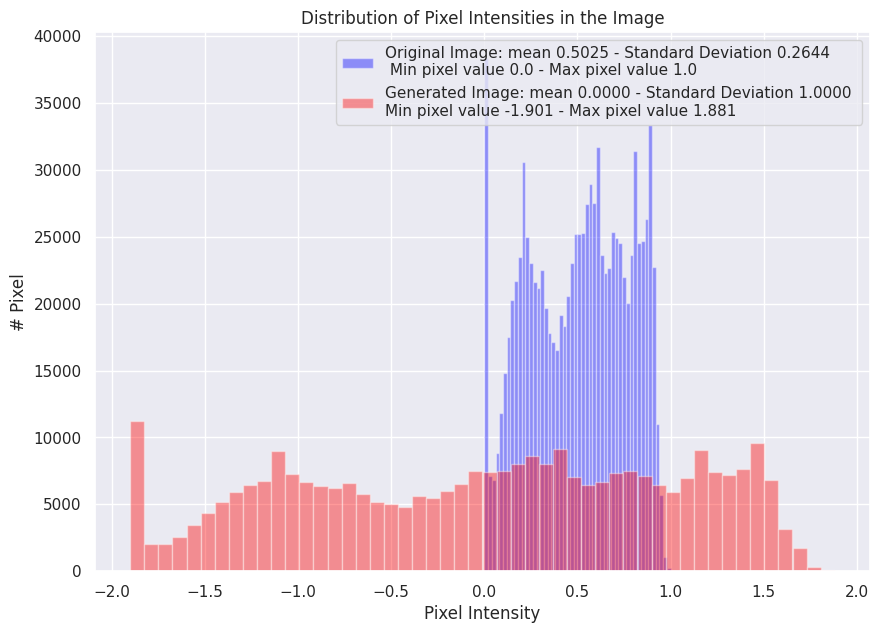

In [ ]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(),
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue',
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(),
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}',
             color='red',
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')


In [ ]:
# Generate documentation in a markdown file
doc_content = """
# Notebook Documentation

This notebook performs an exploratory data analysis and image preprocessing steps on a chest X-ray dataset.

## Sections

1.  **Data Loading and Exploration**:
    - Mount Google Drive to access data.
    - Import necessary libraries (pandas, numpy, matplotlib, seaborn, os).
    - List files in the images directory.
    - Load the training data from 'Data_Entry_2017_v2020.csv' into a pandas DataFrame.
    - Display the shape and head of the DataFrame.
    - Get information about the DataFrame including data types and non-null counts.
    - Check the number of unique patient IDs.
    - List the columns of the DataFrame.
    - Count the occurrences of each finding label in the dataset.

2.  **Image Analysis**:
    - Select random image filenames from the dataset.
    - Set the directory path for the images.
    - Display a sample raw chest X-ray image.
    - Print the dimensions, pixel value range, mean, and standard deviation of the raw image.
    - Plot a histogram of the pixel intensity distribution for the raw image. (Note: `distplot` is deprecated, consider using `histplot` or `displot`).

3.  **Image Preprocessing**:
    - Import `ImageDataGenerator` from `tensorflow.keras.preprocessing.image`.
    - Initialize `ImageDataGenerator` with `samplewise_center=True` and `samplewise_std_normalization=True` for image preprocessing.
    - Create a new column 'Mass' in the DataFrame based on 'Finding Labels'.
    - Use `flow_from_dataframe` to create a generator for loading and preprocessing images. (Note: There are warnings about invalid image filenames).
    - Plot a sample processed image from the generator.
    - Print the dimensions, pixel value range, mean, and standard deviation of the processed image.
    - Plot histograms of the pixel intensity distributions for both the original and processed images to compare the effect of preprocessing. (Note: `distplot` is deprecated, consider using `histplot` or `displot`).

## Key Findings and Observations

- The dataset contains 28045 rows and 11 columns.
- There are 7317 unique patient IDs.
- The most frequent finding label is 'No Finding'.
- The image dimensions and pixel values of the raw image are inspected.
- Image preprocessing using `ImageDataGenerator` standardizes the pixel values to have a mean close to 0 and a standard deviation close to 1.

## Next Steps

- Address the warnings about invalid image filenames in the `flow_from_dataframe` step.
- Consider updating the plotting code to use `histplot` or `displot` instead of the deprecated `distplot`.
- Continue with further image preprocessing or model building as needed.
"""

with open("notebook_documentation.md", "w") as f:
    f.write(doc_content)

print("Documentation file 'notebook_documentation.md' created.")